#Analysis

    1. The urban city type has the most drivers
    2. Most rides have low average fares which could be an indicator of short trip durations
    3. Suburban and urban city types have similar average fares

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
city_df = pd.read_csv("raw_data/city_data.csv")
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
ride_df = pd.read_csv("raw_data/ride_data.csv")
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [5]:
combo_df = ride_df.merge(city_df, on=['city'])
combo_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [35]:
grp_combo_df = combo_df.groupby(['city'])
avg_fares = grp_combo_df['fare'].mean()
total_rides = grp_combo_df['ride_id'].count()
num_drivers = grp_combo_df['driver_count'].max()
city_types = combo_df['type'].unique()


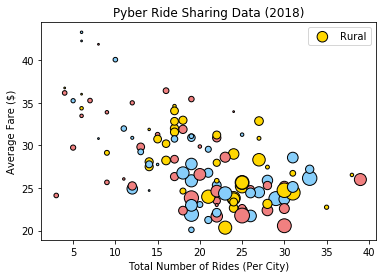

In [53]:

colors = ['Gold','LightSkyBlue','LightCoral']

plt.scatter(total_rides, avg_fares,s=(num_drivers*3), c=colors, linewidths=1, edgecolor='black')
plt.title("Pyber Ride Sharing Data (2018)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
legend = ('Rural','Suburban','Urban')
plt.legend(legend)
plt.show()

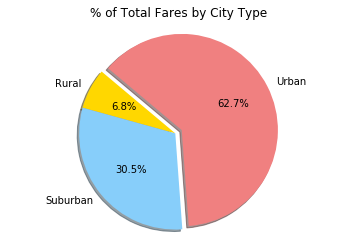

In [40]:
#Total Fares by City Type
grp_types_df = combo_df.groupby(['type'])
total_fares = grp_types_df['fare'].sum()

labels = ['Rural','Suburban','Urban']

colors = ['Gold','LightSkyBlue','LightCoral']

explode = (0, 0, 0.075)


plt.title("% of Total Fares by City Type")
plt.pie(total_fares, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

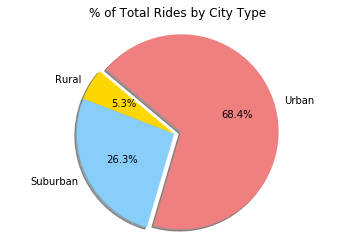

In [22]:
#Total Rides by City Type
total_rides = grp_types_df['ride_id'].count()

labels = ['Rural','Suburban','Urban']

colors = ['Gold','LightSkyBlue','LightCoral']

explode = (0, 0, 0.075)


plt.title("% of Total Rides by City Type")
plt.pie(total_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

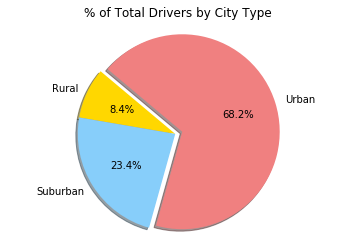

In [23]:
#Total Drivers by City Type
total_drivers = grp_types_df['driver_count'].max()

labels = ['Rural','Suburban','Urban']

colors = ['Gold','LightSkyBlue','LightCoral']

explode = (0, 0, 0.075)


plt.title("% of Total Drivers by City Type")
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()